In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv('D:\\Adarsh_Laptop\\studetmater\\python\\GitHub\\train\\train.csv')
test=pd.read_csv('D:\\Adarsh_Laptop\\studetmater\\python\\GitHub\\test\\test.csv')

In [3]:
train.shape

(199523, 41)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 41 columns):
age                                 199523 non-null int64
class_of_worker                     199523 non-null object
industry_code                       199523 non-null int64
occupation_code                     199523 non-null int64
education                           199523 non-null object
wage_per_hour                       199523 non-null int64
enrolled_in_edu_inst_lastwk         199523 non-null object
marital_status                      199523 non-null object
major_industry_code                 199523 non-null object
major_occupation_code               199523 non-null object
race                                199523 non-null object
hispanic_origin                     198649 non-null object
sex                                 199523 non-null object
member_of_labor_union               199523 non-null object
reason_for_unemployment             199523 non-null object
full_par

In [5]:
print 'Train size: ',train.shape
print 'Test size:  ',test.shape

Train size:  (199523, 41)
Test size:   (99762, 41)


In [6]:
test.income_level=test.income_level.map(lambda x: x.rstrip('+.')).astype('int64')

In [7]:
print 'Unique values in train set Income Level column: ',train.income_level.unique()
print 'Unique values in test set Income Level column: ',test.income_level.unique()

Unique values in train set Income Level column:  [-50000  50000]
Unique values in test set Income Level column:  [-50000  50000]


In [8]:
#let encode these unique values in 0 and 1 , to do that we will use LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [9]:
label = LabelEncoder()
label.fit(train.income_level)
train.income_level=label.transform(train.income_level).astype('int64')

In [10]:
train.income_level.value_counts()

0    187141
1     12382
Name: income_level, dtype: int64

In [11]:
#label_1=LabelEncoder()
#label_1.fit(test.income_level)
test.income_level=label.transform(test.income_level).astype('int64')

In [12]:
test.income_level.value_counts()

0    93576
1     6186
Name: income_level, dtype: int64

In [13]:
train.select_dtypes(include=[object]).shape

(199523, 28)

In [14]:
train_str=train.select_dtypes(include=[object])
train_num=train.select_dtypes(include=['int64'])

In [15]:
test_str=test.select_dtypes(include=[object])
test_num=test.select_dtypes(include=['int64'])

In [16]:
train_num.shape

(199523, 13)

In [17]:
test_num.shape

(99762, 13)

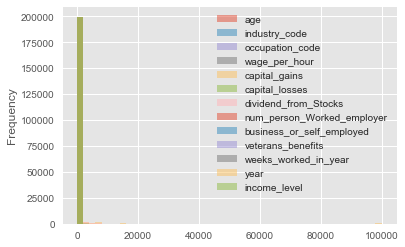

In [79]:
import matplotlib
plt.figure(figsize=(10,6))
matplotlib.style.use('ggplot')
train_num.plot.hist(by=[train_num.age],bins=50,alpha=0.5)

In [42]:
train_num.columns

Index([u'age', u'industry_code', u'occupation_code', u'wage_per_hour',
       u'capital_gains', u'capital_losses', u'dividend_from_Stocks',
       u'num_person_Worked_employer', u'business_or_self_employed',
       u'veterans_benefits', u'weeks_worked_in_year', u'year',
       u'income_level'],
      dtype='object')

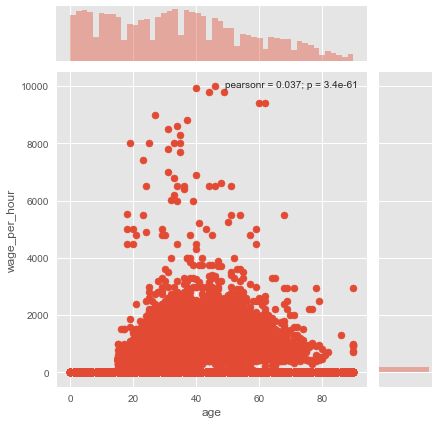

In [53]:
sns.jointplot(train_num['age'],train_num['wage_per_hour'],kind='scatter')

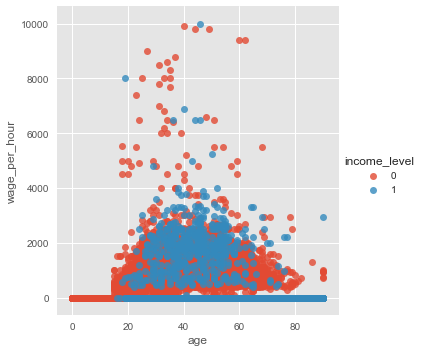

In [54]:
fig=plt.figure(figsize=(12,8))
sns.lmplot('age','wage_per_hour',data=train_num,hue='income_level',fit_reg=False)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

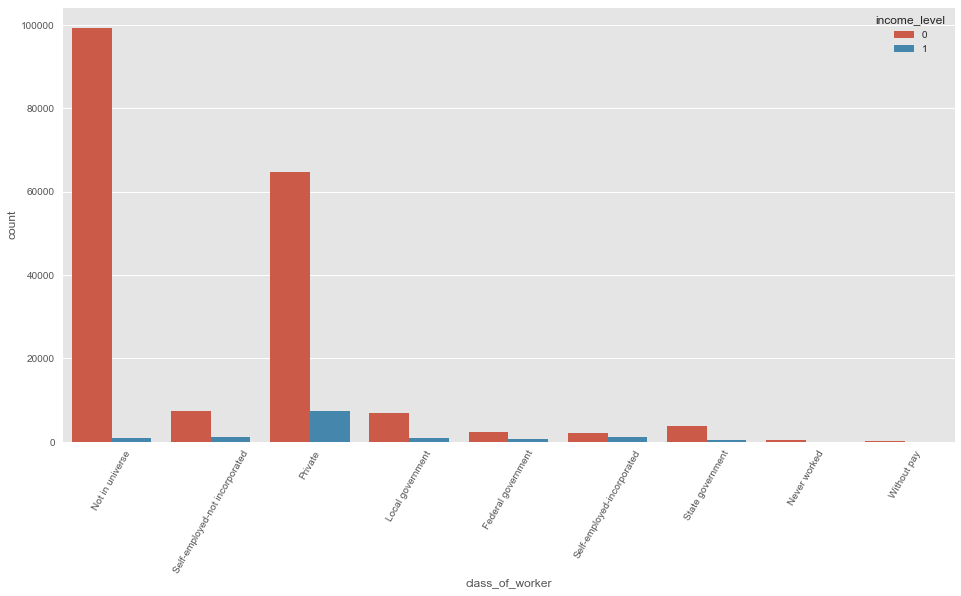

In [55]:
fig = plt.figure(figsize=(16,8))
sns.countplot(x='class_of_worker',data=train_str,hue=train_num.income_level)
plt.xticks(rotation=60)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

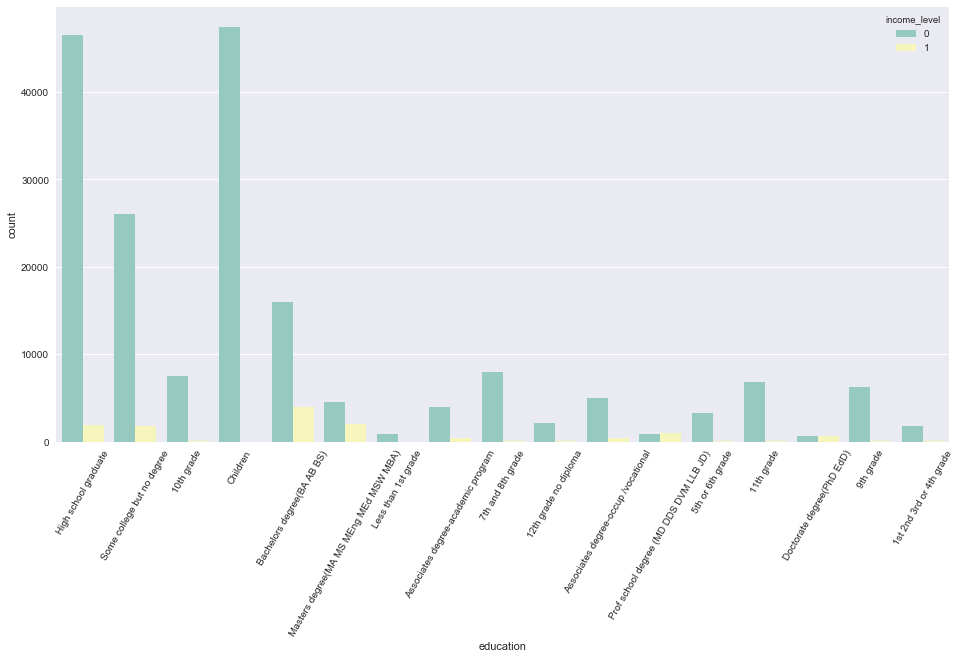

In [56]:
fig = plt.figure(figsize=(16,8))
sns.set(style="darkgrid")

ax=sns.countplot(x='education',data=train_str,hue=train_num.income_level,palette='Set3',linewidth=5)
plt.xticks(rotation=60)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

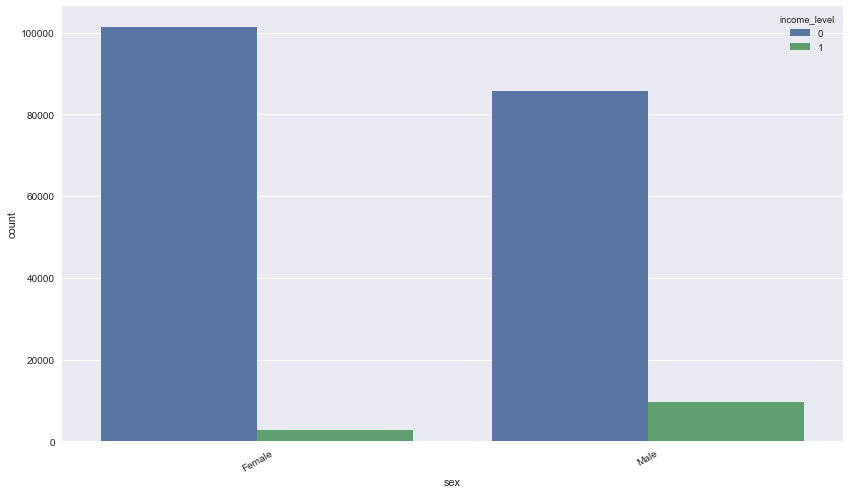

In [57]:
fig=plt.figure(figsize=(14,8))
sns.countplot(x='sex',data=train_str,hue=train_num.income_level)
plt.xticks(rotation=30)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

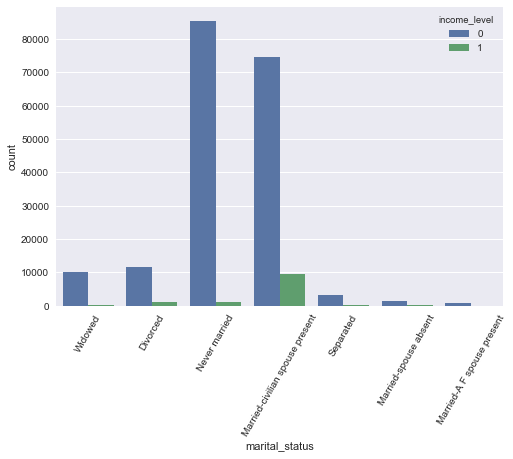

In [58]:
sns.countplot(x='marital_status',data=train_str,hue=train_num.income_level)
plt.xticks(rotation=60)

In [18]:
train_str.columns

Index([u'class_of_worker', u'education', u'enrolled_in_edu_inst_lastwk',
       u'marital_status', u'major_industry_code', u'major_occupation_code',
       u'race', u'hispanic_origin', u'sex', u'member_of_labor_union',
       u'reason_for_unemployment', u'full_parttime_employment_stat',
       u'tax_filer_status', u'region_of_previous_residence',
       u'state_of_previous_residence', u'd_household_family_stat',
       u'd_household_summary', u'migration_msa', u'migration_reg',
       u'migration_within_reg', u'live_1_year_ago', u'migration_sunbelt',
       u'family_members_under_18', u'country_father', u'country_mother',
       u'country_self', u'citizenship', u'fill_questionnaire_veteran_admin'],
      dtype='object')

In [19]:
train_num.isnull().sum()

age                           0
industry_code                 0
occupation_code               0
wage_per_hour                 0
capital_gains                 0
capital_losses                0
dividend_from_Stocks          0
num_person_Worked_employer    0
business_or_self_employed     0
veterans_benefits             0
weeks_worked_in_year          0
year                          0
income_level                  0
dtype: int64

In [20]:
train_num.corr()

,age,industry_code,occupation_code,wage_per_hour,capital_gains,capital_losses,dividend_from_Stocks,num_person_Worked_employer,business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,income_level
age,1.000000,0.157822,0.117414,0.036938,0.053590,0.063351,0.104976,0.140887,-0.002265,0.674844,0.206181,0.004413,0.135720
industry_code,0.157822,1.000000,0.563493,0.165980,0.066017,0.072586,0.012774,0.642096,0.252694,0.476475,0.754472,0.003430,0.196190
occupation_code,0.117414,0.563493,1.000000,0.194498,0.002534,0.043680,-0.026726,0.515554,0.228952,0.438680,0.655613,-0.003140,0.013414
wage_per_hour,0.036938,0.165980,0.194498,1.000000,-0.001082,0.010993,-0.005731,0.191543,0.054051,0.113094,0.195687,0.002283,0.024528
capital_gains,0.053590,0.066017,0.002534,-0.001082,1.000000,-0.012700,0.131476,0.058015,0.015048,0.051530,0.083549,0.005243,0.240725
capital_losses,0.063351,0.072586,0.043680,0.010993,-0.012700,1.000000,0.042427,0.084255,0.024116,0.075391,0.100762,0.000096,0.147417
dividend_from_Stocks,0.104976,0.012774,-0.026726,-0.005731,0.131476,0.042427,1.000000,0.007206,-0.004885,0.054585,0.013823,0.001913,0.175779
num_person_Worked_employer,0.140887,0.642096,0.515554,0.191543,0.058015,0.084255,0.007206,1.000000,0.240553,0.463334,0.747302,0.018774,0.222684
business_or_self_employed,-0.002265,0.252694,0.228952,0.054051,0.015048,0.024116,-0.004885,0.240553,1.000000,0.177448,0.265872,0.007377,0.040473
veterans_benefits,0.674844,0.476475,0.438680,0.113094,0.051530,0.075391,0.054585,0.463334,0.177448,1.000000,0.532279,0.003122,0.140930


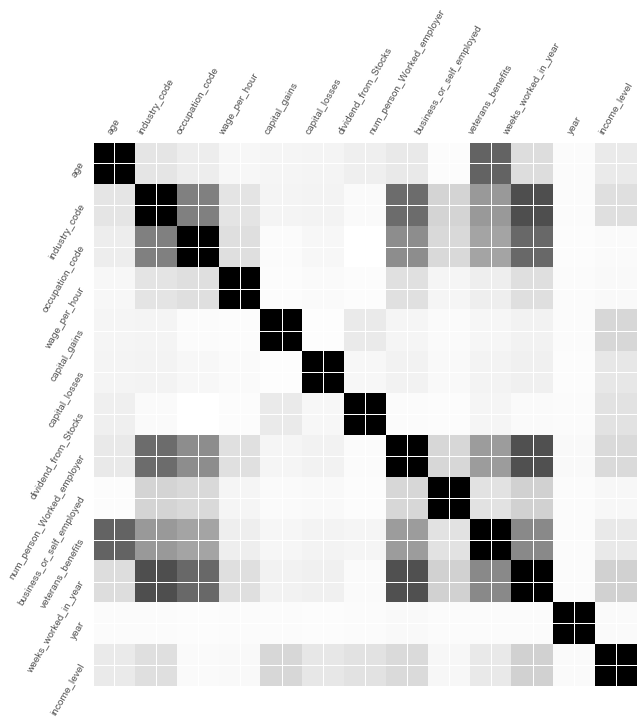

In [82]:
fig,ax=plt.subplots(figsize=(10,10))
ax.matshow(train_num.corr())
#plt.set_cmap()
plt.xticks(range(len(train_num.columns)),train_num.columns,rotation=60)
plt.yticks(range(len(train_num.columns)),train_num.columns,rotation=60)
plt.show()

In [21]:
train_num=train_num.copy()
train_num.drop('weeks_worked_in_year',axis=1,inplace=True)
train_num.shape

(199523, 12)

In [22]:
test_num=test_num.copy()
test_num.drop('weeks_worked_in_year',axis=1,inplace=True)
test_num.shape

(99762, 12)

In [23]:
test_num.shape

(99762, 12)

In [24]:
#missing value in categorical
temp=(train_str.isnull().sum()/len(train_str))*100 < 5
temp_test = (test_str.isnull().sum()/len(test_str))*100 <5

In [25]:
train_str[temp.index].shape

(199523, 28)

In [26]:
test_str.shape

(99762, 28)

In [27]:
temp

class_of_worker                      True
education                            True
enrolled_in_edu_inst_lastwk          True
marital_status                       True
major_industry_code                  True
major_occupation_code                True
race                                 True
hispanic_origin                      True
sex                                  True
member_of_labor_union                True
reason_for_unemployment              True
full_parttime_employment_stat        True
tax_filer_status                     True
region_of_previous_residence         True
state_of_previous_residence          True
d_household_family_stat              True
d_household_summary                  True
migration_msa                       False
migration_reg                       False
migration_within_reg                False
live_1_year_ago                      True
migration_sunbelt                   False
family_members_under_18              True
country_father                    

In [28]:
temp.index

Index([u'class_of_worker', u'education', u'enrolled_in_edu_inst_lastwk',
       u'marital_status', u'major_industry_code', u'major_occupation_code',
       u'race', u'hispanic_origin', u'sex', u'member_of_labor_union',
       u'reason_for_unemployment', u'full_parttime_employment_stat',
       u'tax_filer_status', u'region_of_previous_residence',
       u'state_of_previous_residence', u'd_household_family_stat',
       u'd_household_summary', u'migration_msa', u'migration_reg',
       u'migration_within_reg', u'live_1_year_ago', u'migration_sunbelt',
       u'family_members_under_18', u'country_father', u'country_mother',
       u'country_self', u'citizenship', u'fill_questionnaire_veteran_admin'],
      dtype='object')

In [29]:

train_str=train_str[train_str.columns[pd.Series(temp.values)]]
test_str=test_str[test_str.columns[pd.Series(temp_test.values)]]

In [30]:
test_str.shape

(99762, 28)

In [31]:
train_str.fillna(value='Unavailable',inplace=True)

In [32]:
temp_test=(test_str.isnull().sum()/len(test_str))*100 < 5
test_str=test_str[test_str.columns[pd.Series(temp_test.values)]]

In [33]:
test_str=test_str.copy()
test_str.fillna(value='Unavailable',inplace=True)

In [34]:
test_str.citizenship.value_counts()/len(test_str)*100 < 5

 Native- Born in the United States              False
 Foreign born- Not a citizen of U S             False
 Foreign born- U S citizen by naturalization     True
 Native- Born abroad of American Parent(s)       True
 Native- Born in Puerto Rico or U S Outlying     True
Name: citizenship, dtype: bool

In [35]:
for col in test_str.columns:
    temp=test_str[col].value_counts()/len(test_str)*100<5
    uniqList=[]
    for indx in temp.index:
        if temp[indx] == True:
            uniqList.append(indx)
    for x in uniqList:
        index = 0
        for y in test_str[col]:
            if x.strip() == y.strip():
                
                test_str[col].iloc[index]='Other'
                index=index+1
            else:
                index=index+1
print 'Done'
    

Done


In [36]:
train_str.head()

,class_of_worker,education,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_labor_union,...,state_of_previous_residence,d_household_family_stat,d_household_summary,live_1_year_ago,family_members_under_18,country_father,country_mother,country_self,citizenship,fill_questionnaire_veteran_admin
0,Not in universe,High school graduate,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,Not in universe under 1 year old,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe
1,Self-employed-not incorporated,Some college but no degree,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,...,Arkansas,Householder,Householder,No,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe
2,Not in universe,10th grade,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,...,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,Not in universe under 1 year old,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,Not in universe
3,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,Yes,Both parents present,United-States,United-States,United-States,Native- Born in the United States,Not in universe
4,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,Yes,Both parents present,United-States,United-States,United-States,Native- Born in the United States,Not in universe


In [37]:
for col in train_str.columns:
    temp=train_str[col].value_counts()/len(train_str)*100<5
    uniqList=[]
    for indx in temp.index:
        if temp[indx] == True:
            uniqList.append(indx)
    for x in uniqList:
        index = 0
        for y in train_str[col]:
            if x.strip() == y.strip():
                
                train_str[col].iloc[index]='Other'
                index=index+1
            else:
                index=index+1
print 'Done'

Done


In [38]:
train_str_1=train_str.apply(lambda x:x.str.strip(),axis=1)
test_str_1=test_str.apply(lambda x:x.str.strip(),axis=1)

In [39]:
# Test for categorical levels in train and test data
Done=0
for train_1 in train_str_1.columns:
#for test in test_str.columns:
    temp_train=train_str_1[train_1].value_counts().index
    temp_test=test_str_1[train_1].value_counts().index
    if all(temp_train.isin(temp_test)) == True :
        Done="Fine"
    else:
        print train
        Done="wrong"
                    
print Done                 

Fine


In [40]:
test_str_1=test_str.apply(lambda x:x.str.strip(),axis=1)
test_str_1.class_of_worker.value_counts()

Not in universe    50079
Private            36071
Other              13612
Name: class_of_worker, dtype: int64

In [41]:
#remove dependent variable for train_num
train_y=train_num.income_level
train_num.drop('income_level',axis=1,inplace=True)

In [42]:
test_y=test_num.income_level
test_num.drop('income_level',axis=1,inplace=True)

In [43]:
train_num.shape

(199523, 11)

In [44]:
test_str_1.shape

(99762, 28)

In [45]:
train_num_col=train_num.columns
test_num_col=test_num.columns

In [46]:
train_num.var()== 0

age                           False
industry_code                 False
occupation_code               False
wage_per_hour                 False
capital_gains                 False
capital_losses                False
dividend_from_Stocks          False
num_person_Worked_employer    False
business_or_self_employed     False
veterans_benefits             False
year                          False
dtype: bool

In [47]:
test_num.var() == 0

age                           False
industry_code                 False
occupation_code               False
wage_per_hour                 False
capital_gains                 False
capital_losses                False
dividend_from_Stocks          False
num_person_Worked_employer    False
business_or_self_employed     False
veterans_benefits             False
year                          False
dtype: bool

In [48]:
train_str.columns

Index([u'class_of_worker', u'education', u'enrolled_in_edu_inst_lastwk',
       u'marital_status', u'major_industry_code', u'major_occupation_code',
       u'race', u'hispanic_origin', u'sex', u'member_of_labor_union',
       u'reason_for_unemployment', u'full_parttime_employment_stat',
       u'tax_filer_status', u'region_of_previous_residence',
       u'state_of_previous_residence', u'd_household_family_stat',
       u'd_household_summary', u'live_1_year_ago', u'family_members_under_18',
       u'country_father', u'country_mother', u'country_self', u'citizenship',
       u'fill_questionnaire_veteran_admin'],
      dtype='object')

In [49]:
def LabelEncode(dataframe_train,dataframe_test):
    cv_1 = LabelEncoder()
    for col in dataframe_train.columns:
        cv_1.fit(dataframe_train[col])
        dataframe_train[col]=cv_1.transform(dataframe_train[col])
        dataframe_test[col]=cv_1.transform(dataframe_test[col])
    return "Done"

In [50]:
LabelEncode(train_str_1,test_str_1)

'Done'

In [51]:
test_str.class_of_worker.value_counts()

 Not in universe    50079
 Private            36071
Other               13612
Name: class_of_worker, dtype: int64

In [52]:
train_str.class_of_worker.value_counts()

Not in universe    100245
Private             72028
Other               27250
Name: class_of_worker, dtype: int64

In [53]:
train_d = pd.concat([train_str_1,train_num],axis=1)
test_d = pd.concat([test_str_1,test_num],axis=1)

In [54]:
test_d.drop(['migration_msa','migration_reg','migration_within_reg','migration_sunbelt'],axis=1,inplace=True)

In [55]:
test_d.shape

(99762, 35)

In [56]:
from imblearn.over_sampling import RandomOverSampler 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [57]:
train_y.value_counts()


0    187141
1     12382
Name: income_level, dtype: int64

In [58]:
#Under sampling
rnd=RandomUnderSampler(random_state=0,replacement=True)
train_X_un,train_y_un=rnd.fit_sample(train_d,train_y)

In [59]:
from collections import Counter
(Counter(train_y_un))

Counter({0: 12382, 1: 12382})

In [60]:
#over sampling
rnd_ov=RandomOverSampler(random_state=0)
train_X_ov,train_y_ov=rnd_ov.fit_sample(train_d,train_y)

In [61]:
Counter(train_y_ov)

Counter({0: 187141, 1: 187141})

In [62]:
# SMOTE
rnd_sm=SMOTE(random_state=0,kind='borderline2',k=10,k_neighbors=10,m=10,m_neighbors=10)
train_X_sm,train_y_sm=rnd_sm.fit_sample(train_d,train_y)

C:\Program Files\Anaconda2\lib\site-packages\imblearn\utils\deprecation.py:50: DeprecationWarning: 'k' is deprecated from 0.2 and will be removed in 0.4. Use 'k_neighbors' instead.
  category=DeprecationWarning)
C:\Program Files\Anaconda2\lib\site-packages\imblearn\utils\deprecation.py:50: DeprecationWarning: 'm' is deprecated from 0.2 and will be removed in 0.4. Use 'm_neighbors' instead.
  category=DeprecationWarning)


In [63]:
Counter(train_y_sm)

Counter({0: 187141, 1: 187141})

In [64]:
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from sklearn.model_selection import KFold,cross_val_score,StratifiedKFold,cross_val_predict,GridSearchCV


In [65]:
st=StratifiedKFold(n_splits=10,random_state=0)
st

StratifiedKFold(n_splits=10, random_state=0, shuffle=False)

In [66]:
def cross_val_fun(train_x,train_Y):
   
    return cross_val_score(BernoulliNB(),train_x,train_Y,cv=st,scoring='accuracy').mean()
    

In [67]:
print 'under: ' , cross_val_fun(train_X_un,train_y_un)
print 'Over: ',cross_val_fun(train_X_ov,train_y_ov)
print 'SMOTE: ',cross_val_fun(train_X_sm,train_y_sm)

under:  0.772935662587
Over:  0.772024856145
SMOTE:  0.821939239593


In [68]:
train_X_sm.shape

(374282L, 35L)

In [69]:
#SMOKE

gr=BernoulliNB()
gr.fit(train_X_sm,train_y_sm)
predictions=gr.predict(test_d)

In [70]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score

In [71]:
accuracy = accuracy_score(test_y,predictions)
print accuracy

0.700156372166


In [72]:
Counter(test_y)

Counter({0: 93576, 1: 6186})

In [73]:
Counter(predictions)

Counter({0: 65311, 1: 34451})

In [74]:
conf_matrix=confusion_matrix(test_y,predictions)
conf_matrix[:,1]

array([29089,  5362], dtype=int64)

In [75]:
pd.crosstab(test_y,predictions,rownames=["True"],colnames=["Predictions"],margins=True)

Predictions,0,1,All
True,,,
0,64487,29089,93576
1,824,5362,6186
All,65311,34451,99762


In [76]:
print classification_report(test_y,predictions)

             precision    recall  f1-score   support

          0       0.99      0.69      0.81     93576
          1       0.16      0.87      0.26      6186

avg / total       0.94      0.70      0.78     99762



In [77]:
from sklearn.model_selection import GridSearchCV

grid_param={'alpha':range(1,10),'fit_prior':[True,False]}
grid=GridSearchCV(BernoulliNB(),param_grid=grid_param,cv=st,scoring='accuracy')
grid.fit(train_X_sm,train_y_sm)
pred_grid=grid.predict(test_d)
print 'accuracy',accuracy_score(test_y,pred_grid)

accuracy 0.700156372166


In [78]:
print 'classification report \n',classification_report(test_y,pred_grid)

classification report 
             precision    recall  f1-score   support

          0       0.99      0.69      0.81     93576
          1       0.16      0.87      0.26      6186

avg / total       0.94      0.70      0.78     99762



In [79]:
pd.crosstab(test_y,pred_grid,rownames=['True'],colnames=['Predicted'],margins=True)

Predicted,0,1,All
True,,,
0,64487,29089,93576
1,824,5362,6186
All,65311,34451,99762


In [80]:
#Tree based Models
from sklearn.ensemble import RandomForestClassifier

In [81]:
#SMOTE
rand_forest=RandomForestClassifier(n_estimators=100,random_state=0,verbose=1)
rand_forest.fit(train_X_sm,train_y_sm)
rand_predictions=rand_forest.predict(test_d)

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.8min finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.9s finished


In [82]:
print 'accuracy of RandomForest',accuracy_score(test_y,rand_predictions)

accuracy of RandomForest 0.94858763858


In [83]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics

In [84]:
def modelfit(arg,train_X_sm,train_y_sm,test_X,test_y,useTrainCV=True,cv_folds=5,early_stoping_rounds=50):
    if useTrainCV:
        xgb_params=arg.get_xgb_params()
        xtrain=xgb.DMatrix(train_X_sm,label=train_y_sm)
        cvresult=xgb.cv(xgb_params,xtrain,nfold=cv_folds,early_stopping_rounds=early_stoping_rounds,num_boost_round=arg.get_params()['n_estimators'],metrics='auc')
        #print cvresult
        arg.set_params(n_estimators=cvresult.shape[0])
        
    arg.fit(train_X_sm,train_y_sm,eval_metric='auc')
    #Predict training set:
    dtrain_predictions = arg.predict(test_X)
    dtrain_predprob = arg.predict_proba(test_X)[:,1]
        
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(test_y, dtrain_predictions)
    print "AUC Score (Test): %f" % metrics.roc_auc_score(test_y, dtrain_predprob)
                    
    feat_imp = pd.Series(arg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.9573
AUC Score (Test): 0.954280


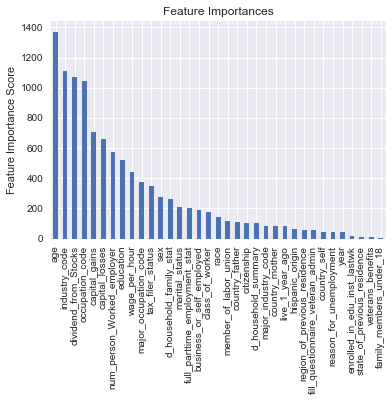

In [85]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, train_d, train_y,test_d,test_y)

In [86]:
test_predictions=xgb1.predict(test_d)
test_proba=xgb1.predict_proba(test_d)

In [87]:
xgb1.set_params()

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=425, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8)

In [88]:
print 'accuracy on Test data: ',accuracy_score(test_y,test_predictions)
print 'roc auc score: ',metrics.roc_auc_score(test_y,test_proba[:,1])

accuracy on Test data:  0.957258274694
roc auc score:  0.954280168672


In [89]:
#Tune max_depth and min_child_weight

param_test1={
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

gsearch1= GridSearchCV(XGBClassifier(learning_rate =0.1, n_estimators=425, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), param_grid=param_test1,scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train_d,train_y)
gsearch1.grid_scores_,gsearch1.best_params_,gsearch1.best_score_

C:\Program Files\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.94988, std: 0.00213, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.94988, std: 0.00212, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.94993, std: 0.00228, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.95177, std: 0.00217, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.95153, std: 0.00219, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.95166, std: 0.00216, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.95053, std: 0.00244, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.95068, std: 0.00241, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.95071, std: 0.00239, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.94772, std: 0.00270, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.94859, std: 0.00237, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.94903, std: 0.00253, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 5, 'min_child_weight': 1

In [90]:

param_test2={
    'max_depth':[4,5,6],
    'min_child_weight':[1,2,3]
}

gsearch2= GridSearchCV(XGBClassifier(learning_rate =0.1, n_estimators=425, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), param_grid=param_test2,scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train_d,train_y)
gsearch2.grid_scores_,gsearch2.best_params_,gsearch2.best_score_

C:\Program Files\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.95133, std: 0.00211, params: {'max_depth': 4, 'min_child_weight': 1},
  mean: 0.95145, std: 0.00215, params: {'max_depth': 4, 'min_child_weight': 2},
  mean: 0.95130, std: 0.00217, params: {'max_depth': 4, 'min_child_weight': 3},
  mean: 0.95177, std: 0.00217, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.95188, std: 0.00202, params: {'max_depth': 5, 'min_child_weight': 2},
  mean: 0.95153, std: 0.00219, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.95149, std: 0.00224, params: {'max_depth': 6, 'min_child_weight': 1},
  mean: 0.95137, std: 0.00224, params: {'max_depth': 6, 'min_child_weight': 2},
  mean: 0.95118, std: 0.00236, params: {'max_depth': 6, 'min_child_weight': 3}],
 {'max_depth': 5, 'min_child_weight': 2},
 0.9518812419357191)

In [91]:
#Tune gamma
param_gamma={'gamma':[i/10.0 for i in range(0,10)]}
gsearch3=GridSearchCV(XGBClassifier(learning_rate =0.1, n_estimators=425, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), param_grid=param_gamma,scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train_d,train_y)
gsearch3.grid_scores_,gsearch3.best_params_,gsearch3.best_score_

C:\Program Files\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.95188, std: 0.00202, params: {'gamma': 0.0},
  mean: 0.95172, std: 0.00220, params: {'gamma': 0.1},
  mean: 0.95183, std: 0.00221, params: {'gamma': 0.2},
  mean: 0.95178, std: 0.00218, params: {'gamma': 0.3},
  mean: 0.95182, std: 0.00211, params: {'gamma': 0.4},
  mean: 0.95177, std: 0.00217, params: {'gamma': 0.5},
  mean: 0.95177, std: 0.00209, params: {'gamma': 0.6},
  mean: 0.95183, std: 0.00217, params: {'gamma': 0.7},
  mean: 0.95193, std: 0.00216, params: {'gamma': 0.8},
  mean: 0.95181, std: 0.00236, params: {'gamma': 0.9}],
 {'gamma': 0.8},
 0.95193103306887716)


Model Report
Accuracy : 0.9574
AUC Score (Test): 0.954292


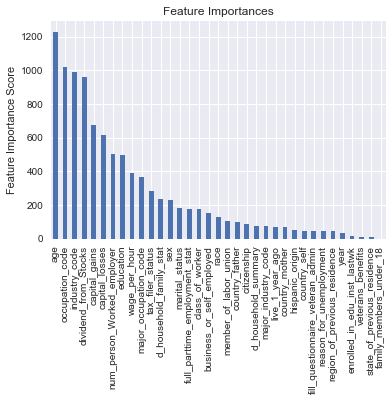

In [92]:
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=2,
 gamma=0.8,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb2, train_d, train_y,test_d,test_y)

In [93]:
#Tune colsample_bytress and subsample
param_4={'colsample_bytree':[i/10.0 for i in range(6,10)],
        'subsample':[i/10.0 for i in range(6,10)]}
gsearch4=GridSearchCV(XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=2,
 gamma=0.8,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27),param_grid=param_4,scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train_d,train_y)
gsearch4.grid_scores_,gsearch3.best_params_,gsearch3.best_score_

C:\Program Files\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.95055, std: 0.00231, params: {'subsample': 0.6, 'colsample_bytree': 0.6},
  mean: 0.95088, std: 0.00246, params: {'subsample': 0.7, 'colsample_bytree': 0.6},
  mean: 0.95110, std: 0.00241, params: {'subsample': 0.8, 'colsample_bytree': 0.6},
  mean: 0.95114, std: 0.00233, params: {'subsample': 0.9, 'colsample_bytree': 0.6},
  mean: 0.95021, std: 0.00248, params: {'subsample': 0.6, 'colsample_bytree': 0.7},
  mean: 0.95057, std: 0.00241, params: {'subsample': 0.7, 'colsample_bytree': 0.7},
  mean: 0.95077, std: 0.00237, params: {'subsample': 0.8, 'colsample_bytree': 0.7},
  mean: 0.95117, std: 0.00235, params: {'subsample': 0.9, 'colsample_bytree': 0.7},
  mean: 0.94991, std: 0.00232, params: {'subsample': 0.6, 'colsample_bytree': 0.8},
  mean: 0.95062, std: 0.00247, params: {'subsample': 0.7, 'colsample_bytree': 0.8},
  mean: 0.95094, std: 0.00226, params: {'subsample': 0.8, 'colsample_bytree': 0.8},
  mean: 0.95094, std: 0.00238, params: {'subsample': 0.9, 'colsample_bytree'

In [99]:
#Tune regularization parameter
param_5={'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]}
gsearch5=GridSearchCV(XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=2,
 gamma=0.8,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27),param_grid=param_5,scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(train_d,train_y)
gsearch5.grid_scores_,gsearch5.best_params_,gsearch5.best_score_

C:\Program Files\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.95092, std: 0.00225, params: {'reg_alpha': 1e-05},
  mean: 0.95058, std: 0.00241, params: {'reg_alpha': 0.01},
  mean: 0.95077, std: 0.00254, params: {'reg_alpha': 0.1},
  mean: 0.95079, std: 0.00230, params: {'reg_alpha': 1},
  mean: 0.94426, std: 0.00230, params: {'reg_alpha': 100}],
 {'reg_alpha': 1e-05},
 0.95091520520112671)


Model Report
Accuracy : 0.9552
AUC Score (Test): 0.949204


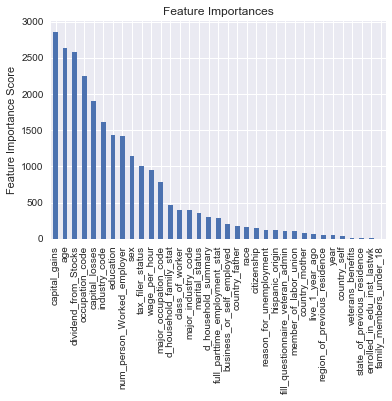

In [100]:
#Tune learning rate
xgb2 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=2,
 gamma=0.8,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb2, train_d, train_y,test_d,test_y)